In [8]:
#Talha Çomak
#150160726
#########################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
##########################
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D


df1_class0 = df1[df1['y']==0]
df1_class1 = df1[df1['y']==1]
df2_class0 = df2[df2['y']==0]
df2_class1 = df2[df2['y']==1]
df10 = df1_class0.cov()[["x1", "x2"]].head(2)
df11 = df1_class1.cov()[["x1", "x2"]].head(2)
df20 = df2_class0.cov()[["x1", "x2"]].head(2)
df21 = df2_class1.cov()[["x1", "x2"]].head(2)

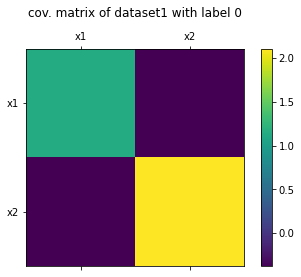

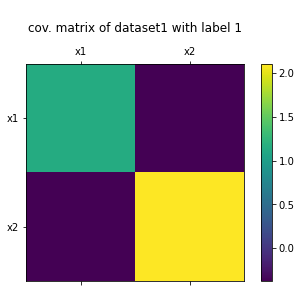

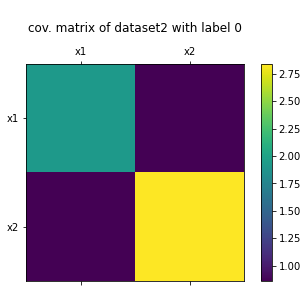

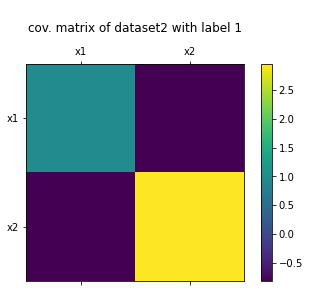

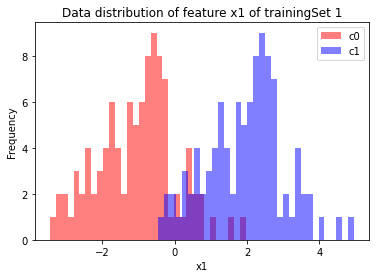

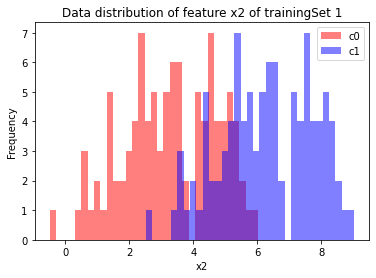

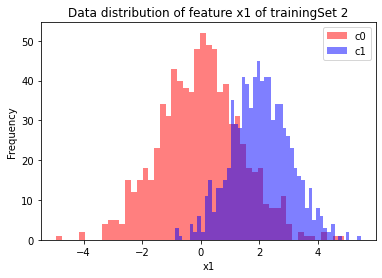

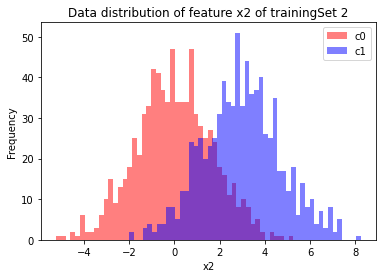

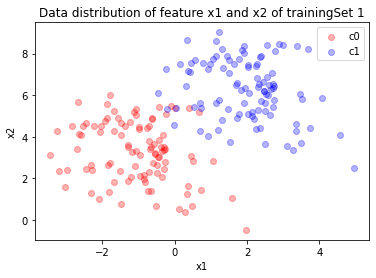

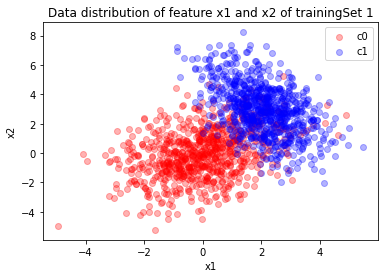

In [10]:
#PART A: Examine training sets here. plots etc.


#covariance matrices ----------------------------->

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df10,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.gca().set(title='cov. matrix of dataset1 with label 0\n')
plt.show()

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df11,interpolation='nearest') #cov. matrix of dataset1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.gca().set(title='\ncov. matrix of dataset1 with label 1\n')
plt.show()

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df20,interpolation='nearest') #cov. matrix of dataset2
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.gca().set(title='\ncov. matrix of dataset2 with label 0\n')
plt.show()

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df21,interpolation='nearest') #cov. matrix of dataset2
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
plt.gca().set(title='\ncov. matrix of dataset2 with label 1\n')
plt.show()

#Covariance matrices are similar to each other.They are symmetric. 
#Lower variace values of them are on top-left. Bigger ones are on bottom-right.

# feature histograms -------------------------------------->

d1c0x1 = df1_class0['x1']
d1c1x1 = df1_class1['x1']
fig= plt.figure()
plt.hist(d1c0x1, bins=33, color="red", alpha=0.5, label="c0")
plt.hist(d1c1x1, bins=33, color="blue", alpha=0.5, label="c1")
plt.gca().set(title='Data distribution of feature x1 of trainingSet 1', xlabel = 'x1', ylabel='Frequency')
plt.legend(loc="upper right")
plt.show()


d1c0x2 = df1_class0['x2']
d1c1x2 = df1_class1['x2']
fig = plt.figure()
plt.hist(d1c0x2, bins=33, color="red", alpha=0.5, label="c0")
plt.hist(d1c1x2, bins=33, color="blue", alpha=0.5, label="c1")
plt.gca().set(title='Data distribution of feature x2 of trainingSet 1', xlabel = 'x2', ylabel='Frequency')
plt.legend(loc="upper right")
plt.show()

d2c0x1 = df2_class0['x1']
d2c1x1 = df2_class1['x1']
fig= plt.figure()
plt.hist(d2c0x1, bins=50, color="red", alpha=0.5, label="c0")
plt.hist(d2c1x1, bins=50, color="blue", alpha=0.5, label="c1")
plt.gca().set(title='Data distribution of feature x1 of trainingSet 2', xlabel = 'x1', ylabel='Frequency')
plt.legend(loc="upper right")
plt.show()

d2c0x2 = df2_class0['x2']
d2c1x2 = df2_class1['x2']
fig2= plt.figure()
plt.hist(d2c0x2, bins=50, color="red", alpha=0.5, label="c0")
plt.hist(d2c1x2, bins=50, color="blue", alpha=0.5, label="c1")
plt.gca().set(title='Data distribution of feature x2 of trainingSet 2', xlabel = 'x2', ylabel='Frequency')
plt.legend(loc="upper right")
plt.show()

# Feature x1 of train set1 is very distinguishable and prominent for each classes. 
# There are a little intersecting data.
# Feature x2 of train set1 contains more intersecting data than feature x1 data.
# Feature x1 and feature x2 of train set2 are similiar. Their variances are small and most of the data is on around the mean.
# So they have normal distribution. However their classes are mostly intersecting on both features.
# As a result train1 data is better than train2 data.



# datasets ----------------------------->


fig3 = plt.figure()
plt.scatter(d1c0x1, d1c0x2, color = "red", alpha=0.3, label="c0")
plt.scatter(d1c1x1, d1c1x2, color = "blue", alpha=0.3, label="c1")
plt.gca().set(title='Data distribution of feature x1 and x2 of trainingSet 1', xlabel='x1', ylabel='x2')
plt.legend(loc="upper right")
plt.show()

fig3 = plt.figure()
plt.scatter(d2c0x1, d2c0x2, color = "red", alpha=0.3, label="c0")
plt.scatter(d2c1x1, d2c1x2, color = "blue", alpha=0.3, label="c1")
plt.gca().set(title='Data distribution of feature x1 and x2 of trainingSet 1', xlabel='x1', ylabel='x2')
plt.legend(loc="upper right")
plt.show()
#---------

In [11]:
#Implmenet PART B:

def mean(x):
    numpy_array = np.array([x.mean()["x1"], x.mean()["x2"]])
    return numpy_array

mean_d1c0 = mean(df1_class0)
mean_d1c1 = mean(df1_class1)
mean_d2c0 = mean(df2_class0)
mean_d2c1 = mean(df2_class1)

print("train1 class0 mean: ", mean_d1c0, "\ntrain1 class0 covariance:\n", df10.to_numpy(), "\n")
print("train1 class1 mean: ", mean_d1c1, "\ntrain1 class1 covariance:\n", df11.to_numpy(), "\n")
print("train2 class0 mean: ", mean_d2c0, "\ntrain2 class0 covariance:\n", df20.to_numpy(), "\n")
print("train2 class1 mean: ", mean_d2c1, "\ntrain2 class1 covariance:\n", df21.to_numpy(), "\n")

cov10 = df10.to_numpy()
cov11 = df11.to_numpy()
cov20 = df20.to_numpy()
cov21 = df21.to_numpy()

numpy_df1class0 =df1_class0[["x1", "x2"]].head(2).to_numpy()
numpy_df1class1 =df1_class1[["x1", "x2"]].head(2).to_numpy()
numpy_df2class0 =df2_class0[["x1", "x2"]].head(2).to_numpy()
numpy_df2class1 =df2_class1[["x1", "x2"]].head(2).to_numpy()

P1c0 = numpy_df1class0.shape[1]/(numpy_df1class0.shape[1] + numpy_df1class1.shape[1])
P2c0 = numpy_df2class0.shape[1]/(numpy_df2class0.shape[1] + numpy_df2class1.shape[1])
P1c1 = 1 - P1c0
P2c1 = 1 - P2c0


# Computing g(x)

def trainBayes(cov0, cov1, mean0, mean1, p0, p1, testX):
    # if means are different but cov. matrices are equal
    if((round(cov0[0][0], 5) == round(cov1[0][0], 5) and round(cov0[0][1], 5) == round(cov1[0][1], 5) and 
       round(cov0[1][0], 5) == round(cov1[1][0], 5) and round(cov0[1][1], 5) == round(cov1[1][1], 5)) and 
       (mean0[0] != mean1[0] or mean0[1] != mean1[1])):
        
        g0 = np.dot(np.dot(mean0, np.linalg.inv(cov0)), testX.transpose()) + np.log(p0) - (1/2)*(np.dot(np.dot(mean0, np.linalg.inv(cov0)), mean0.transpose()))
        g1 = np.dot(np.dot(mean1, np.linalg.inv(cov1)), testX.transpose()) + np.log(p1) - (1/2)*(np.dot(np.dot(mean1, np.linalg.inv(cov1)), mean1.transpose()))
        
        if g0 < g1:
            return 1
        else:
            return 0
        
    # if cov. matrices equal to var^2.I
    elif(round(cov0[0][0], 5) == round(cov0[1][1], 5) and round(cov0[0][1], 5) == 0 and round(cov0[1][0], 5) == 0 and
        round(cov1[0][0], 5) == round(cov1[1][1], 5) and round(cov1[0][1], 5) == 0 and round(cov1[1][0], 5) == 0):
        g0 = np.dot(mean0, testX.transpose())/cov0[0][0] - np.log(p0) + np.dot(mean0, mean0.transpose())/2*cov0[0][0]
        g1 = np.dot(mean1, testX.transpose())/cov1[0][0] - np.log(p1) + np.dot(mean1, mean1.transpose())/2*cov1[0][0]
        
        if g1 < g0:
            return 0
        else:
            return 1
    else: # general case
        
        g0 = -(0.5*np.dot(np.dot((testX - mean0), np.linalg.inv(cov0)), (testX-mean0).transpose()) ) - (0.5*np.log(np.linalg.det(cov0))) + np.log(p0)
        g1 = -(0.5*np.dot(np.dot((testX - mean1), np.linalg.inv(cov1)), (testX-mean1).transpose()) ) - (0.5*np.log(np.linalg.det(cov1))) + np.log(p1)
        if g0 > g1:
            return 0
        else:
            return 1


test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")
test1clas0 = test1[test1['y']==0]
test1clas1 = test1[test1['y']==1]
numpyT1C0 = test1clas0[["x1", "x2"]].to_numpy()
numpyT1C1 = test1clas1[["x1", "x2"]].to_numpy()
test2clas0 = test2[test2['y']==0]
test2clas1 = test2[test2['y']==1]
numpyT2C0 = test2clas0[["x1", "x2"]].to_numpy()
numpyT2C1 = test2clas1[["x1", "x2"]].to_numpy()
         
    
    # Saving results
    
forvectorT1 = test1[["x1", "x2"]].to_numpy()
forvectorT2 = test2[["x1", "x2"]].to_numpy()
vector1 = np.empty((0,1), int)
for i in forvectorT1:  # i don't know why did i do this part :?
    x = np.array([[trainBayes(cov10, cov11, mean_d1c0, mean_d1c1, P1c0, P1c1, i)]]) 
    np.append(vector1, x, axis=0)
    
vector2 = np.empty((0,1), int)
              
for i in forvectorT2:  # i don't know why did i do this part too :?
    x = np.array([[trainBayes(cov10, cov11, mean_d1c0, mean_d1c1, P1c0, P1c1, i)]])
    np.append(vector2, x, axis=0)

    #  TESTINGGGGGGGGGGGG 1 ----------------->
    
correct = 0
incorrect = 0
    
for i in numpyT1C0:
    if(trainBayes(cov10, cov11, mean_d1c0, mean_d1c1, P1c0, P1c1, i) == 0):
        correct+=1
    else:
        incorrect += 1
              
for i in numpyT1C1:
    if(trainBayes(cov10, cov11, mean_d1c0, mean_d1c1, P1c0, P1c1, i) == 1):
        correct+=1
    else:
        incorrect += 1   
              
e1 = 100*incorrect/(correct+incorrect)
              
    
    
     #  TESTINGGGGGGGGGGGG 2 ----------------->
        
correct = 0
incorrect = 0          
              
for i in numpyT2C0:
    if(trainBayes(cov20, cov21, mean_d2c0, mean_d2c1, P2c0, P2c1, i) == 0):
        correct+=1
    else:
        incorrect += 1
              
for i in numpyT2C1:
    if(trainBayes(cov20, cov21, mean_d2c0, mean_d2c1, P2c0, P2c1, i) == 1):
        correct+=1
    else:
        incorrect += 1 
              
e2 = 100*incorrect/(correct+incorrect)              
              
print ("Error rate of set 1: ", e1, "\nError rate of set 2: ", e2)  

train1 class0 mean:  [-1.04624698  3.26924606] 
train1 class0 covariance:
 [[ 1.1470413  -0.37697361]
 [-0.37697361  2.1043151 ]] 

train1 class1 mean:  [1.95375302 6.26924606] 
train1 class1 covariance:
 [[ 1.1470413  -0.37697361]
 [-0.37697361  2.1043151 ]] 

train2 class0 mean:  [ 0.00246486 -0.01971604] 
train2 class0 covariance:
 [[1.92211159 0.85797698]
 [0.85797698 2.83934376]] 

train2 class1 mean:  [2.0536608  2.97765078] 
train2 class1 covariance:
 [[ 0.99769947 -0.81880324]
 [-0.81880324  2.94962903]] 

Error rate of set 1:  2.0 
Error rate of set 2:  11.5


In [12]:
#Implement PART C:

# Combining train and test sets

test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

merged1 = pd.merge(df1, test1, how='outer')
merged2 = pd.merge(df2, test2, how='outer')


# 5-fold cross validation

from sklearn.model_selection import KFold


data1 = merged1.to_numpy()
data2 = merged2.to_numpy()


kf = KFold(n_splits = 5, random_state=1, shuffle=True)

errorArr = []

for train_index, test_index in kf.split(data1):
    #print("TRAIN: ", train_index, "TEST: ", test_index)
    xtrain, xtest = data1[train_index], data1[test_index]
    
    df = pd.DataFrame(data=xtrain, columns=["x1", "x2", "y"])
    class0 = df[df['y'] == 0]
    class1 = df[df['y'] == 1]
    cov0 = class0.cov()[['x1', 'x2']].head(2).to_numpy()
    cov1 = class1.cov()[['x1', 'x2']].head(2).to_numpy()
    mean0 = mean(class0)
    mean1 = mean(class1)
    P0 = class0[['x1', 'x2']].to_numpy().shape[1]/(class0[['x1', 'x2']].to_numpy().shape[1] + class1[['x1', 'x2']].to_numpy().shape[1])
    P1 = 1-P0
    
    correct = 0
    incorrect = 0
    
    dft = pd.DataFrame(data=xtest, columns=["x1", "x2", "y"])
    testS0 = dft[round(dft['y'])==0]
    test0 = testS0[["x1", "x2"]].to_numpy()
    testS1 = dft[round(dft['y'])==1]
    test1 = testS1[["x1", "x2"]].to_numpy()
    
    for i in test0:
        if(trainBayes(cov0, cov1, mean0, mean1, P0, P1, i) == 0):
            correct+=1
        else:
            incorrect += 1
    for i in test1:
        if(trainBayes(cov0, cov1, mean0, mean1, P0, P1, i) == 1):
            correct+=1
        else:
            incorrect += 1

    e1 = 100*incorrect/(correct+incorrect)
    errorArr.append(e1)

errArr2 = []    

for train_index, test_index in kf.split(data2):
    #print("TRAIN: ", train_index, "TEST: ", test_index)
    xtrain, xtest = data2[train_index], data2[test_index]
    
    df = pd.DataFrame(data=xtrain, columns=["x1", "x2", "y"])
    class0 = df[df['y'] == 0]
    class1 = df[df['y'] == 1]
    cov0 = class0.cov()[['x1', 'x2']].head(2).to_numpy()
    cov1 = class1.cov()[['x1', 'x2']].head(2).to_numpy()
    mean0 = mean(class0)
    mean1 = mean(class1)
    P0 = class0[['x1', 'x2']].to_numpy().shape[1]/(class0[['x1', 'x2']].to_numpy().shape[1] + class1[['x1', 'x2']].to_numpy().shape[1])
    P1 = 1-P0
    
    correct = 0
    incorrect = 0
    
    dft = pd.DataFrame(data=xtest, columns=["x1", "x2", "y"])
    testS0 = dft[round(dft['y'])==0]
    test0 = testS0[["x1", "x2"]].to_numpy()
    testS1 = dft[round(dft['y'])==1]
    test1 = testS1[["x1", "x2"]].to_numpy()
    
    
    for i in test0:
        if(trainBayes(cov0, cov1, mean0, mean1, P0, P1, i) == 0):
            correct+=1
        else:
            incorrect += 1
    for i in test1:
        if(trainBayes(cov0, cov1, mean0, mean1, P0, P1, i) == 1):
            correct+=1
        else:
            incorrect += 1

    e1 = 100*incorrect/(correct+incorrect)
    errArr2.append(e1)

print("Errors for dataset1: ", errorArr, '\n', "Errors for dataset2: ", errArr2)
print("Average error of dataset1: ", np.average(errorArr), "\n", "Average error of dataset2: ", np.average(errArr2))

    #Results
#PartB:
#Error rate of set 1:  2.0 
#Error rate of set 2:  11.5
#PartC:
#Average error of dataset1:  3.3333333333333335 
#Average error of dataset2:  10.25
    #Comment
#Error rates are similar so the model can be considered as valid.


Errors for dataset1:  [5.0, 0.0, 5.0, 5.0, 1.6666666666666667] 
 Errors for dataset2:  [9.5, 10.0, 8.75, 11.0, 12.0]
Average error of dataset1:  3.3333333333333335 
 Average error of dataset2:  10.25


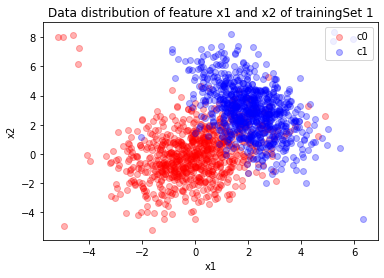

dataset2 modified error:  12.25


In [14]:
#Implement Part D:

df2m_class0 = df2m[df2m['y']==0]
df2m_class1 = df2m[df2m['y']==1]
df2mc0x1 = df2m_class0["x1"]
df2mc0x2 = df2m_class0["x2"]
df2mc1x1 = df2m_class1["x1"]
df2mc1x2 = df2m_class1["x2"]

df10_cov = df2m_class0.cov()[["x1", "x2"]].head(2).to_numpy()
df11_cov = df2m_class1.cov()[["x1", "x2"]].head(2).to_numpy()

mean0 = mean(df2m_class0)
mean1 = mean(df2m_class1)
numpy_df1cs0 =df2m_class0[["x1", "x2"]].head(2).to_numpy()
numpy_df1cs1 =df2m_class1[["x1", "x2"]].head(2).to_numpy()
P0 = numpy_df1cs0.shape[1]/(numpy_df1cs0.shape[1] + numpy_df1cs1.shape[1])
P1 = 1 - P1c0

fig = plt.figure()
plt.scatter(df2mc0x1, df2mc0x2, color = "red", alpha=0.3, label="c0")
plt.scatter(df2mc1x1, df2mc1x2, color = "blue", alpha=0.3, label="c1")
plt.gca().set(title='Data distribution of feature x1 and x2 of trainingSet 1', xlabel='x1', ylabel='x2')
plt.legend(loc="upper right")
plt.show()

test2 = pd.read_csv("test2.csv")
test2clas0 = test2[test2['y']==0]
test2clas1 = test2[test2['y']==1]
numpyT2C0 = test2clas0[["x1", "x2"]].to_numpy()
numpyT2C1 = test2clas1[["x1", "x2"]].to_numpy()

    
correct = 0
incorrect = 0
    
for i in numpyT2C0:
    if(trainBayes(df10_cov, df11_cov, mean0, mean1, P0, P1, i) == 0):
        correct+=1
    else:
        incorrect += 1
              
for i in numpyT2C1:
    if(trainBayes(df10_cov, df11_cov, mean0, mean1, P0, P1, i) == 1):
        correct+=1
    else:
        incorrect += 1   
              
e1 = 100*incorrect/(correct+incorrect)
 
print("dataset2 modified error: ", e1)

# Comparision:
# Modified data include some outliers.
# Error rate of set 2: 11.5 
# dataset2 modified error:  12.25
# Due to outliers error rate of modified set is a little bit higher than dataset2 



In [1]:
#Additional space for your general comments about HW and Bayes Classifier

#Explanations of the HW is very poor, so I spent a lot of time. 
#I think we should have had a demo section about python libraries related this HW.
#But this homework helped me to understand Machine Learning things.
#Bayes Classifier is a simple way of machine learning but if there is a lot of intersecting features between classes;
#This method might be give high error.